# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [23]:
import numpy as np
import pandas as pd
import matplotlib

Загрузите "Boston House Prices dataset" из встроенных наборов 

In [24]:
#from sklearn.datasets import load_boston
#dat = load_boston()
# Эту практическую работу делаю colab. 
# В colab приведённый выше код для загрузки данных из встроенного набора не работает.
# Выдаёт преупреждение что функция load_boston запрещена (depricated) по этическим причинам.
# Ниже загружаю датасет boston из интернета

In [25]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
colname = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

Создайте датафреймы X и y из этих данных.

In [26]:
X = pd.DataFrame(data, columns=colname)
y = pd.DataFrame(target)

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#проверяем размерность получившихся dataset
print(f'{X_train.shape}, {y_train.shape}')

(404, 13), (404, 1)


Масштабируйте данные с помощью StandardScaler.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
stdscal = StandardScaler()
scaled_X_train = stdscal.fit_transform(X_train)

Постройте модель TSNE на тренировочных данных с параметрами n_components=2, learning_rate=250, random_state=42.

In [33]:
from sklearn.manifold import TSNE

In [34]:
tsne = TSNE(learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(scaled_X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


Постройте диаграмму рассеяния на этих данных.

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={"figure.figsize": (8, 6)})
sns.set_style('white')

In [69]:
# X_train_tsne

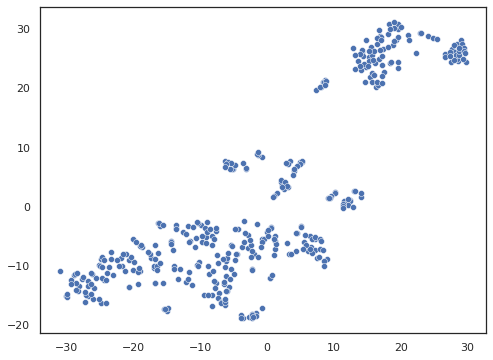

In [81]:
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1])
plt.show()

------------------------------------------------------------------

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


In [37]:
from sklearn.cluster import KMeans

In [38]:
model_kmean = KMeans(n_clusters=3, max_iter=100, random_state=42)
clasters = model_kmean.fit_predict(scaled_X_train)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


In [87]:
scaled_X_train[0]

array([ 1.28770177, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
       -1.42806858,  1.02801516, -0.80217296,  1.70689143,  1.57843444,
        0.84534281, -0.07433689,  1.75350503])

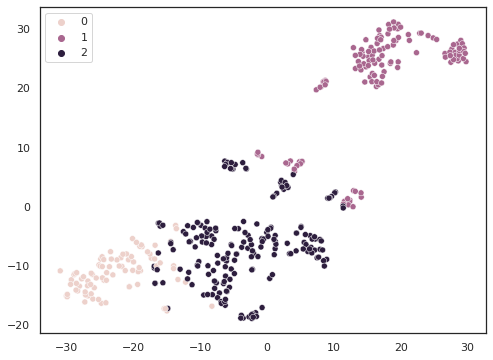

In [88]:
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=clasters)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [40]:
for i in range(3):
  print(f'Для кластера {i} mean(CRIM) = {X_train[clasters==i]["CRIM"].mean():.4f}, mean(price)={y_train[clasters==i][0].mean():.4f}')

Для кластера 0 mean(CRIM) = 0.0736, mean(price)=27.7884
Для кластера 1 mean(CRIM) = 10.7970, mean(price)=16.1654
Для кластера 2 mean(CRIM) = 0.4217, mean(price)=24.9581


------------------------------------------------

## *Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [50]:
X_test_scaled = stdscal.transform(X_test)
test_clusters = model_kmean.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [48]:
for i in range(3):
  print(f'Для кластера {i} mean(CRIM) = {X_test[test_clusters==i]["CRIM"].mean():.4f}, mean(price)={y_test[test_clusters==i][0].mean():.4f}')

Для кластера 0 mean(CRIM) = 0.0621, mean(price)=31.3500
Для кластера 1 mean(CRIM) = 10.1655, mean(price)=16.4371
Для кластера 2 mean(CRIM) = 0.2661, mean(price)=21.8608
